## Tarefas de regressão linear na base de dados do ENEM.

##### Alunos:
- Gabriel Fonseca (2111066)
- Yasmim Santos (2116925)
- Alejandro Elias (2111189)
- Pedro Lucas (2111131)

Base de dados escolhida - Exame Nacional do Ensino Médio (Enem): https://basedosdados.org/dataset/3e9c8804-c31c-4f48-9a45-d67f1c21a859

### Importando as dependências:

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

### Lendo e visualizando os dados:

In [141]:
dtype = {
    "id_inscricao": np.int64,
    "ensino": int,
    "nota_ciencias_natureza": float,
    "nota_ciencias_humanas": float,
    "nota_linguagens_codigos": float,
    "nota_matematica": float,
    "nota_redacao": float,
    "q_formacao_pai": str,
    "q_formacao_mae": str,
    "q_renda_familia": str,
}

df_enem = pd.read_csv(f"../../data/out/enem-dados-tratados.csv", dtype=dtype)

df_enem

,id_inscricao,ensino,nota_ciencias_natureza,nota_ciencias_humanas,nota_linguagens_codigos,nota_matematica,nota_redacao,q_formacao_pai,q_formacao_mae,q_renda_familia,ano
0,150001892848,3,366.8,436.9,374.2,331.4,380.0,B,A,C,2015
1,150002421428,1,512.0,636.9,552.0,549.2,760.0,A,A,C,2015
2,150004396764,1,470.8,519.3,465.2,350.8,580.0,B,A,B,2015
3,150001657786,1,492.6,641.2,553.2,649.5,840.0,A,A,A,2015
4,150005415838,1,473.3,533.4,443.3,447.4,400.0,A,A,A,2015
...,...,...,...,...,...,...,...,...,...,...,...
357268,210054596750,1,450.6,403.1,443.3,479.8,0.0,E,E,B,2022
357269,210056286560,1,416.5,427.3,484.6,376.2,0.0,D,D,A,2022
357270,210057495281,1,462.1,421.7,432.1,530.9,0.0,C,D,B,2022
357271,210056812211,1,519.1,570.4,537.3,388.7,0.0,D,H,B,2022


### Preparando os dados para utilização no modelo:

In [142]:
mm_scaler = MinMaxScaler()

df_enem = df_enem[df_enem["nota_ciencias_natureza"] != 0.0]
df_enem = df_enem[df_enem["nota_ciencias_humanas"] != 0.0]

df_enem["nota_ciencias_natureza_scl"] = mm_scaler.fit_transform(df_enem[["nota_ciencias_natureza"]])
df_enem["nota_ciencias_humanas_scl"] = mm_scaler.fit_transform(df_enem[["nota_ciencias_humanas"]])

df_enem

,id_inscricao,ensino,nota_ciencias_natureza,nota_ciencias_humanas,nota_linguagens_codigos,nota_matematica,nota_redacao,q_formacao_pai,q_formacao_mae,q_renda_familia,ano,nota_ciencias_natureza_scl,nota_ciencias_humanas_scl
0,150001892848,3,366.8,436.9,374.2,331.4,380.0,B,A,C,2015,0.111326,0.236413
1,150002421428,1,512.0,636.9,552.0,549.2,760.0,A,A,C,2015,0.367095,0.595157
2,150004396764,1,470.8,519.3,465.2,350.8,580.0,B,A,B,2015,0.294522,0.384215
3,150001657786,1,492.6,641.2,553.2,649.5,840.0,A,A,A,2015,0.332922,0.602870
4,150005415838,1,473.3,533.4,443.3,447.4,400.0,A,A,A,2015,0.298925,0.409507
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357268,210054596750,1,450.6,403.1,443.3,479.8,0.0,E,E,B,2022,0.258940,0.175785
357269,210056286560,1,416.5,427.3,484.6,376.2,0.0,D,D,A,2022,0.198873,0.219193
357270,210057495281,1,462.1,421.7,432.1,530.9,0.0,C,D,B,2022,0.279197,0.209148
357271,210056812211,1,519.1,570.4,537.3,388.7,0.0,D,H,B,2022,0.379602,0.475874


In [148]:
X = np.array(df_enem["nota_ciencias_natureza_scl"]).reshape(-1, 1)
Y = np.array(df_enem["nota_ciencias_humanas_scl"]).reshape(-1, 1)

poly_feat = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_feat.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_poly, Y, train_size=0.8, random_state=5487
)

print(f"X_train shape: {X_train.shape}\nY_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}\nY_test shape: {Y_test.shape}")

X_train: np.ndarray = X_train
Y_train: np.ndarray = Y_train
X_test: np.ndarray = X_test
Y_test: np.ndarray = Y_test

pd.DataFrame(X_train).head()

X_train shape: (284532, 3)
Y_train shape: (284532, 1)
X_test shape: (71134, 3)
Y_test shape: (71134, 1)


,0,1,2
0,0.288180,0.083048,0.023933
1,0.258411,0.066776,0.017256
2,0.315484,0.099530,0.031400
3,0.112912,0.012749,0.001440
4,0.275145,0.075705,0.020830


### Realizando a regressão:

In [149]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)

df_metrics = pd.DataFrame({
    "Intercept": model.intercept_,
    "Coeficiente(s)": str(list(model.coef_[0])),
    "R2": r2,
})

df_metrics

,Intercept,Coeficiente(s),R2
0,0.28107,"[-0.8187212637513425, 3.8861860648716124, -2.5...",0.518725


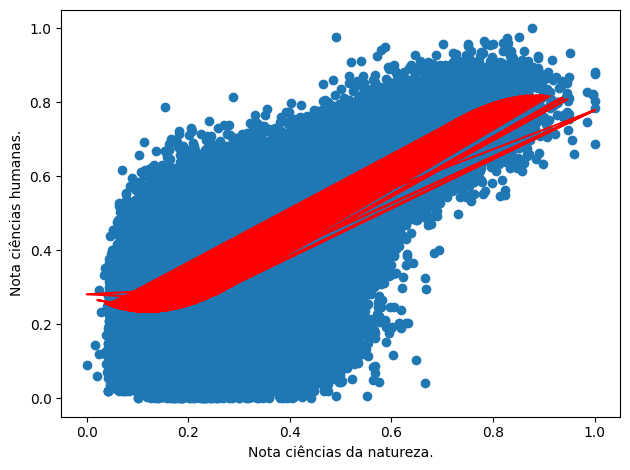

In [150]:
plt.xlabel('Nota ciências da natureza.')
plt.ylabel('Nota ciências humanas.')

# apenas a primeira coluna de X_test
plt.scatter(X, Y)
plt.plot(X_test[:,0], Y_pred, 'r-')
plt.tight_layout()
plt.show()